In [77]:
import pandas as pd
from sklearn.metrics import mean_squared_error
import math

In [199]:
game = 7
df = pd.read_csv('./players.csv')

In [200]:
df[f'game_{game}'][df[f'game_{game}']>0].describe()

count    312.000000
mean       7.748462
std        5.737779
min        0.070000
25%        2.790000
50%        7.005000
75%       12.050000
max       24.300000
Name: game_7, dtype: float64

<Axes: >

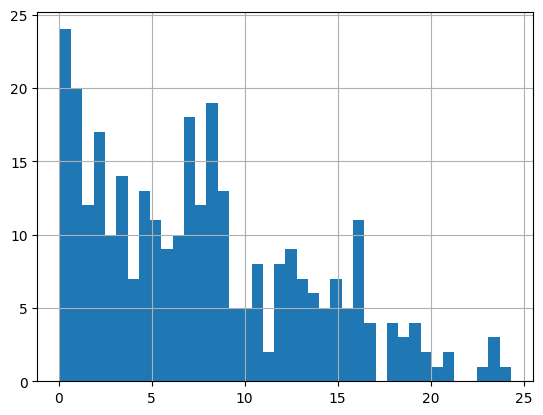

In [201]:
# Score distribution, as Histogram
df[f'game_{game}'][df[f'game_{game}']>0].hist(bins=40)

In [202]:
nonzero = df[df[f'game_{game}']>0]

(nonzero['game_7']-nonzero['proj_7']).abs().describe()

# wow only 1.720738

count    248.000000
mean       1.720738
std        1.826425
min        0.000000
25%        0.500500
50%        1.254000
75%        2.398500
max       14.609000
dtype: float64

<Axes: >

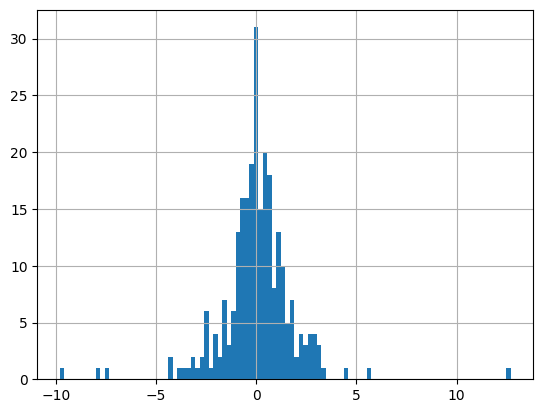

In [159]:
nonzero=df[df['game_7']>0]
nonzero=nonzero[nonzero['game_6']>0]

(nonzero['game_6']-nonzero['game_7']).hist(bins=100)

In [112]:
projNotNull=df[~df['proj_7'].isna()]
fixed = projNotNull[projNotNull['game_7']>0]

mean_squared_error(fixed['game_7'], fixed['proj_7'])


6.283316939516129

In [122]:
mean_squared_error(fixed['game_6'], fixed['game_7'])

16.083766532258068

In [126]:
(nonzero['game_6']-nonzero['proj_6']).abs().mean()

1.4929684684684688

In [189]:
# ESPN projections

report = []
for i in range(1, 8):
    df=df[~df[f'proj_{i}'].isna()]
    df=df[df[f'game_{i}']>5]
    report.append((f'game_{i}', (df[f'game_{i}']-df[f'proj_{i}']).abs().mean()))
report

[('game_1', 1.9864239130434782),
 ('game_2', 1.3681521739130436),
 ('game_3', 1.579478260869565),
 ('game_4', 1.5816847826086955),
 ('game_5', 1.9216521739130432),
 ('game_6', 1.5721630434782612),
 ('game_7', 1.7345760869565217)]

In [193]:
# One game look back

report = []
for i in range(2, 8):
    df=df[~df[f'proj_{i}'].isna()]
    df=df[df[f'game_{i}']>5]
    report.append((f'game_{i}', (df[f'game_{i-1}']-df[f'proj_{i}']).abs().mean()))
report

[('game_2', 1.9535869565217394),
 ('game_3', 1.6700869565217389),
 ('game_4', 1.8742717391304347),
 ('game_5', 1.8840869565217389),
 ('game_6', 2.089054347826087),
 ('game_7', 1.8332717391304352)]

In [184]:
# Average from last 6 games vs game 7

nonzero = df[df['game_7']>0]
last_avg = nonzero[['game_1', 'game_2', 'game_3', 'game_4', 'game_5', 'game_6']].mean(axis=1)

print("Avg Delta")
print((nonzero['game_7']-last_avg).abs().mean())
print("MSE")
print(mean_squared_error(nonzero['game_7'], last_avg))


Avg Delta
2.1670192307692306
MSE
12.305157514245014
